**EXPLORATORY DATA ANALYSIS ON RETAIL SALES DATA**

In [2]:
df=pd.read_csv("customer_shopping_data.csv")
#dataset used from public domain. Link is :https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.shape

(99457, 10)

In [5]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
#there are no null values in the dataset

In [8]:
df.duplicated().sum()

0

In [9]:
#there are no duplicated values in the dataset

In [10]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [12]:
df[['invoice_date']]

,invoice_date
0,5/8/2022
1,12/12/2021
2,9/11/2021
3,16/05/2021
4,24/10/2021
...,...
99452,21/09/2022
99453,22/09/2021
99454,28/03/2021
99455,16/03/2021


In [13]:
try:
  df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
except ValueError:
  df['invoice_date'] = pd.to_datetime(df['invoice_date'],errors='coerce')


In [14]:
df['invoice_date'].describe()

count                         99457
mean     2022-02-04 02:46:59.783424
min             2021-01-01 00:00:00
25%             2021-07-19 00:00:00
50%             2022-02-05 00:00:00
75%             2022-08-22 00:00:00
max             2023-03-08 00:00:00
Name: invoice_date, dtype: object

In [15]:
df['invoice_date']

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [16]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [17]:
df=df.dropna()

In [18]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [20]:
df['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [21]:
df['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

**FEATURE ENGINEERING**

In [22]:
df['year'] = df['invoice_date'].dt.year

In [23]:
df['month'] = df['invoice_date'].dt.month

In [24]:
df[['year','month']].dtypes

year     int32
month    int32
dtype: object

In [25]:
#function for grouping malls
def group_malls(mall_name):
  if (mall_name == "Kanyon" or mall_name == "Istinye Park"):
    return "Luxury Mall"
  elif (mall_name == "Mall of Istanbul" or mall_name == "Cevahir AVM" or mall_name == "Forum Istanbul"):
    return "Mega Mall"
  elif (mall_name == "Emaar Square Mall" or mall_name == "Metrocity" or mall_name == "Zorlu Center"):
    return "Mixed-Use Mall"
  else:
    return "Outlet Mall"


In [26]:
df['mall_typology']=df['shopping_mall'].apply(group_malls)

In [27]:
def group_location(mall_name):
  if (mall_name == "Istinye Park" or mall_name== "Emaar Square Mall"):
    return "Asia"
  else:
    return "Europe"

In [28]:
df['mall_location']=df['shopping_mall'].apply(group_location)

In [29]:
df[["shopping_mall","mall_typology","mall_location"]]

,shopping_mall,mall_typology,mall_location
0,Kanyon,Luxury Mall,Europe
1,Forum Istanbul,Mega Mall,Europe
2,Metrocity,Mixed-Use Mall,Europe
3,Metropol AVM,Outlet Mall,Europe
4,Kanyon,Luxury Mall,Europe
...,...,...,...
99452,Kanyon,Luxury Mall,Europe
99453,Forum Istanbul,Mega Mall,Europe
99454,Metrocity,Mixed-Use Mall,Europe
99455,Istinye Park,Luxury Mall,Asia


In [30]:
df["total_price"]=0

In [31]:
df["total_price"]=df['quantity']*df['price']

In [32]:
df["total_price"]

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: total_price, Length: 99457, dtype: float64

In [33]:
#categorizing ages into age groups
def age_group(age):
  if age>=0 and age<=2:
    return "baby"
  elif age>=3 and age<=39:
    return "young adult"
  elif age>=40 and age<=59:
    return "middle aged adult"
  else:
    return "old adult"



In [34]:
df['age_group']=df['age'].apply(age_group)

In [35]:
df['age_group']

0              young adult
1              young adult
2              young adult
3                old adult
4        middle aged adult
               ...        
99452    middle aged adult
99453          young adult
99454            old adult
99455    middle aged adult
99456          young adult
Name: age_group, Length: 99457, dtype: object

In [36]:
df['total_price_per_gender']=df.groupby('gender')['total_price'].transform("sum")
df['total_price_per_age_group']=df.groupby('age_group')['total_price'].transform("sum")
df['total_price_per_category']=df.groupby('category')['total_price'].transform("sum")
df['total_price_per_payment_method']=df.groupby('payment_method')['total_price'].transform("sum")
df['total_price_per_shopping_mall']=df.groupby('shopping_mall')['total_price'].transform("sum")
df['total_price_per_mall_typology']=df.groupby('mall_typology')['total_price'].transform("sum")
df['total_price_per_mall_location']=df.groupby('mall_location')['total_price'].transform("sum")
df['price_per_gender']=df.groupby('gender')['price'].transform("sum")
df['total_quantity_per_gender']=df.groupby('gender')['quantity'].transform("sum")
df['total_quantity_per_category']=df.groupby('category')['quantity'].transform("sum")
df['total_quantity_per_payment_method']=df.groupby('payment_method')['quantity'].transform("sum")
df['total_quantity_per_shopping_mall']=df.groupby('shopping_mall')['quantity'].transform("sum")
df['total_quantity_per_mall_typology']=df.groupby('mall_typology')['quantity'].transform("sum")
df['total_quantity_per_mall_location']=df.groupby('mall_location')['quantity'].transform("sum")
df['total_quantity_per_age_group']=df.groupby('age_group')['quantity'].transform("sum")


**DESCRIPTIVE STATISTICS**

In [37]:
df.describe()

,age,quantity,price,invoice_date,year,month,total_price,total_price_per_gender,total_price_per_age_group,total_price_per_category,...,total_price_per_mall_typology,total_price_per_mall_location,price_per_gender,total_quantity_per_gender,total_quantity_per_category,total_quantity_per_payment_method,total_quantity_per_shopping_mall,total_quantity_per_mall_typology,total_quantity_per_mall_location,total_quantity_per_age_group
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000,9.945700e+04,9.945700e+04,9.945700e+04,...,9.945700e+04,9.945700e+04,9.945700e+04,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2021.629408,6.113898,2528.789268,1.305492e+08,9.160222e+07,5.078451e+07,...,6.657357e+07,1.884451e+08,3.558118e+07,155103.344289,57764.486110,108669.342007,40391.933499,79022.277628,223821.059976,108867.641845
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,2021.000000,1.000000,5.230000,1.012987e+08,4.829418e+07,6.358247e+05,...,3.790125e+07,3.702493e+07,2.761956e+07,120053.000000,14871.000000,60297.000000,14501.000000,45246.000000,43966.000000,57153.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,2021.000000,3.000000,136.350000,1.012987e+08,9.682800e+07,3.980426e+06,...,6.260994e+07,2.144809e+08,2.761956e+07,120053.000000,30217.000000,105045.000000,29465.000000,74629.000000,254746.000000,114439.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,2022.000000,6.000000,600.170000,1.502071e+08,9.682800e+07,6.792863e+06,...,7.517306e+07,2.144809e+08,4.093180e+07,178659.000000,44277.000000,105045.000000,44894.000000,88922.000000,254746.000000,114439.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2022.000000,9.000000,2700.720000,1.502071e+08,1.063836e+08,1.139968e+08,...,7.582154e+07,2.144809e+08,4.093180e+07,178659.000000,103558.000000,133370.000000,59457.000000,89915.000000,254746.000000,127120.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,2023.000000,12.000000,26250.000000,1.502071e+08,1.063836e+08,1.139968e+08,...,7.582154e+07,2.144809e+08,4.093180e+07,178659.000000,103558.000000,133370.000000,60114.000000,89915.000000,254746.000000,127120.000000
std,14.990054,1.413025,941.184567,NaN,0.636136,3.569511,4222.475781,2.397938e+07,2.150747e+07,5.050673e+07,...,1.327593e+07,6.278835e+07,6.526869e+06,28733.989353,34727.819899,27380.158127,18368.589792,15574.774087,74579.238848,25802.161838


In [38]:
df['age'].mean()

43.42708909377922

The average age of a person shopping in the malls is 43 years

In [39]:
df['age'].mode()

0    37
Name: age, dtype: int64

Customers of age 37 years have the most invoices in shopping malls

In [40]:
df['quantity'].mean()

3.003428617392441

On an average, a customer buys about 3 items of any type from the shopping mall

In [41]:
df['quantity'].max()

5

A quantity of 5 items is the highest quantity purchased by a customer

In [42]:
df['quantity'].min()

1

A quantity of 5 items is the lowest quantity purchased by a customer

In [43]:
df['price'].mean()

689.2563209226097

On an average, a person spends 689.26 Turkish Liras per item in a shopping mall

In [44]:
df['price'].max()

5250.0

The highest purchase for one item made by a customer as per invoice is 5250 Turkish Liras

In [45]:
df['price'].min()

5.23

The lowest purchase for one item made by a customer as per invoice is 5.23 Turkish Liras

In [46]:
df['total_price'].mean()

2528.78926822647

On an average, a person spends about 2528.789 Turkish Liras in a shopping mall

In [47]:
df['total_price'].max()

26250.0

The highest purchase (in total) made by a customer is 26250 Turkish Liras

In [48]:
df['total_price'].min()

5.23

The lowest purchase (in total) made by a customer is 5.23 Turkish Liras

In [49]:
df['invoice_date'].max()

Timestamp('2023-03-08 00:00:00')

The invoices in the malls were made till 8th March, 2023

In [50]:
df['invoice_date'].min()

Timestamp('2021-01-01 00:00:00')

The invoices of the shopping malls in the dataset begin from 1st January, 2021

In [51]:
df['gender'].mode()

0    Female
Name: gender, dtype: object

The dataset has more invoices for females rather than males. The number of purchases done by females are hence higher than those of males.

In [52]:
df['category'].mode()

0    Clothing
Name: category, dtype: object

The dataset has the highest number of invoices related to the category of clothing.

In [53]:
df['payment_method'].mode()

0    Cash
Name: payment_method, dtype: object

The payment method for most invoices is Cash

In [54]:
df['shopping_mall'].mode()

0    Mall of Istanbul
Name: shopping_mall, dtype: object

The maximum number of invoices are from the Mall of Istanbul

In [55]:
df['mall_typology'].mode()

0    Mega Mall
Name: mall_typology, dtype: object

Majority of the invoices come from Mega Mall category of malls.

In [56]:
df['mall_location'].mode()

0    Europe
Name: mall_location, dtype: object

Majority of the invoices come from malls located on the European side of Istanbul

In [57]:
df['month'].mode()

0    1
Name: month, dtype: int32

Most invoices have been issued in the month of January

In [58]:
df['age_group'].mode()

0    young adult
Name: age_group, dtype: object

Most of the invoices have been issued for the young adult age group

**DATA VISUALIZATION**

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Count of Genders purchasing from Malls')

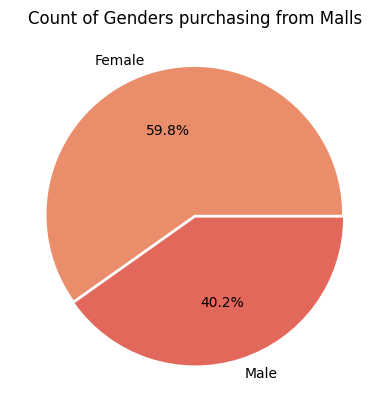

In [60]:
value_counts=df['gender'].value_counts()
explode=(0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("flare"),autopct="%1.1f%%",explode=explode)
plt.title("Count of Genders purchasing from Malls")

More invoices have been issued to females than to males

<ipython-input-61-b56fe3d4d598>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='gender',x='total_price_per_gender',data=df,palette="magma")


Text(0.5, 1.0, 'Total Amount Spent by each Gender')

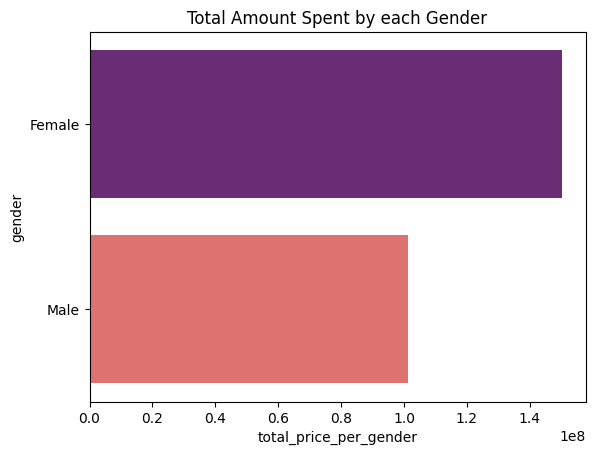

In [61]:
sns.barplot(y='gender',x='total_price_per_gender',data=df,palette="magma")
plt.title("Total Amount Spent by each Gender")

Total amount spent by female customers is more than that of male customers

<ipython-input-62-c53a1eae1ec8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='gender',x='price_per_gender',data=df,palette="magma")


Text(0.5, 1.0, 'Total Price per Item Spent by each Gender')

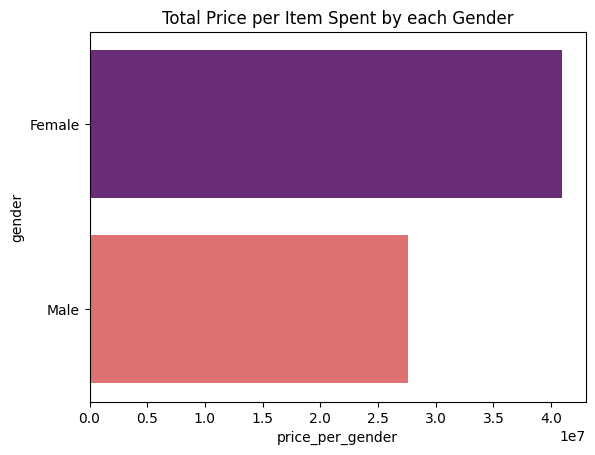

In [62]:
sns.barplot(y='gender',x='price_per_gender',data=df,palette="magma")
plt.title("Total Price per Item Spent by each Gender")

Female customers spend more on a single item as compared to male customers.

Text(0.5, 1.0, 'Comparing Payment method for invoices issued to each gender')

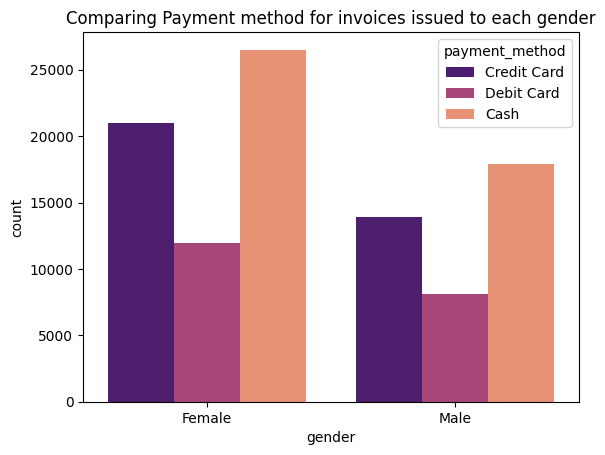

In [63]:
sns.countplot(x='gender',hue='payment_method',palette="magma",data=df)
plt.title("Comparing Payment method for invoices issued to each gender")

Cash is used for payment more than card by both men and women

<ipython-input-64-b0ca39ef2987>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='gender',x='total_quantity_per_gender',data=df,palette="magma")


Text(0.5, 1.0, 'Total Quantity purchased by each gender')

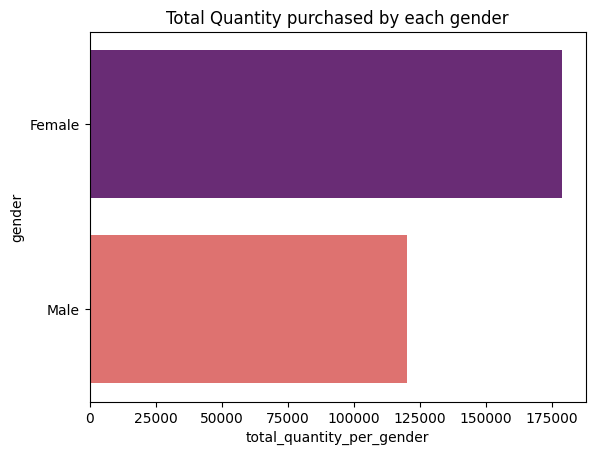

In [64]:
sns.barplot(y='gender',x='total_quantity_per_gender',data=df,palette="magma")
plt.title("Total Quantity purchased by each gender")

Female customers have purchased more items as compared to male customers from the malls of Istanbul

Text(0.5, 1.0, 'Malls visited by each gender')

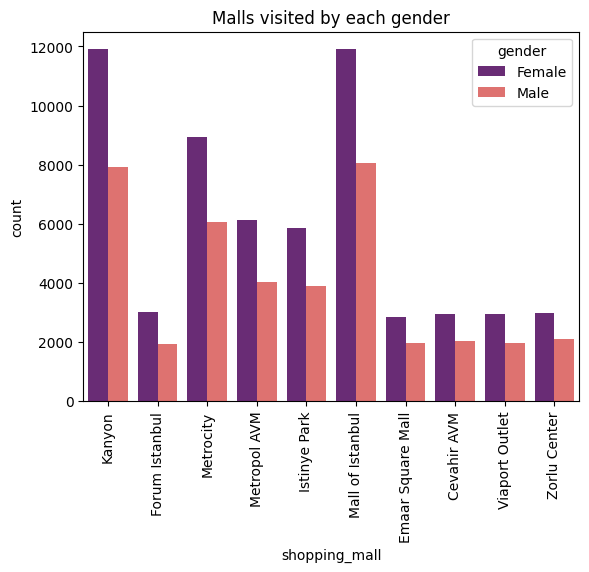

In [65]:
sns.countplot(x=df['shopping_mall'],hue=df['gender'],palette="magma")
plt.xticks(rotation=90)
plt.title("Malls visited by each gender")

Both genders prefer visiting Kanyon Mall and Istinye Park malls in Istanbul. But more number of females visit each mall shown above.

Text(0.5, 1.0, 'Type of Malls visited by each gender')

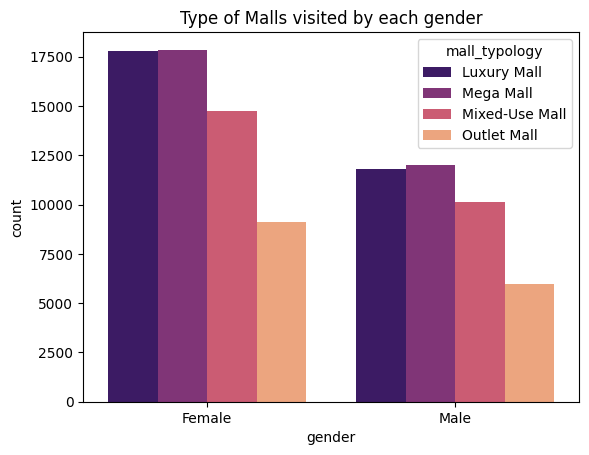

In [66]:
sns.countplot(hue=df['mall_typology'],x=df['gender'],palette="magma")
plt.title("Type of Malls visited by each gender")

More female customers visit luxury and mega malls as compared to mixed-use and outlet malls. Similar is the case with male customers

Text(0.5, 1.0, 'Mall Locations visited by each gender')

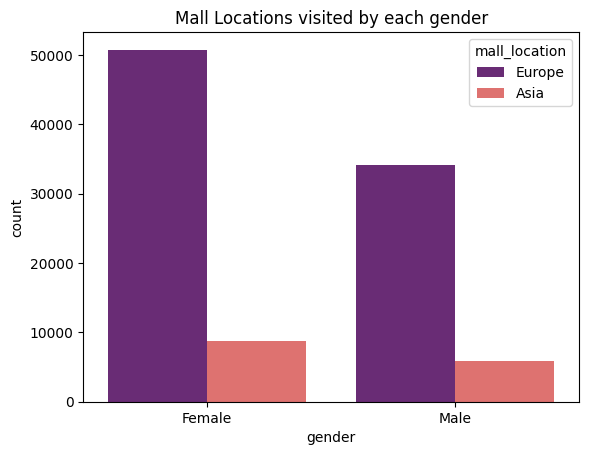

In [67]:
sns.countplot(hue='mall_location',x='gender',data=df,palette="magma")
plt.title("Mall Locations visited by each gender")

Both male and female customers visit malls located on the European side of Istanbul.

Text(0.5, 1.0, 'Years in which each gender visited malls')

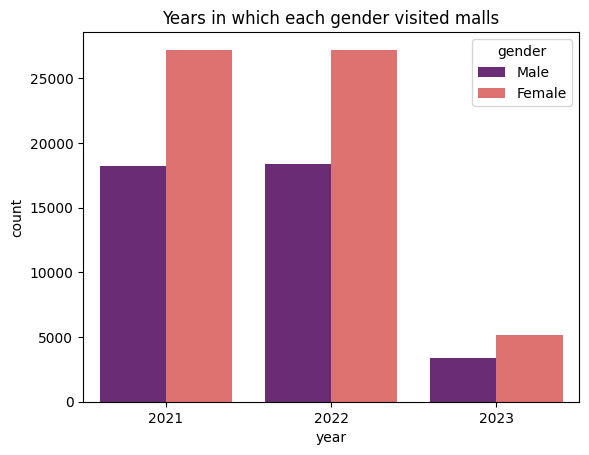

In [68]:
sns.countplot(x=df['year'],hue='gender',data=df,palette="magma")
plt.title("Years in which each gender visited malls")

Invoices issued to each gender have sharply dropped in 2023.

In [69]:
value_counts=df['age_group'].value_counts()

Text(0.5, 1.0, 'Count of Age Groups purchasing from Malls')

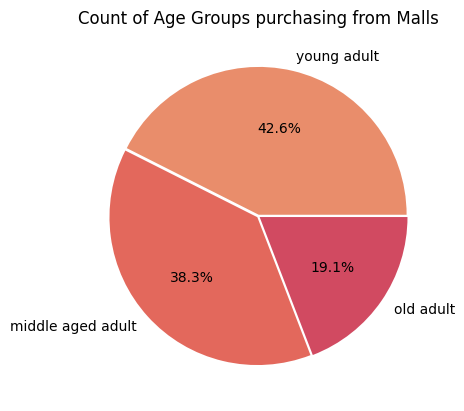

In [70]:
explode=(0.01,0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("flare"),autopct="%1.1f%%",explode=explode)
plt.title("Count of Age Groups purchasing from Malls")

Young adults ( 3 years to 39 years) have more invoices as compared to middle aged and old adults.

<Axes: title={'center': 'Comparison of age groups for each gender'}, xlabel='age_group', ylabel='count'>

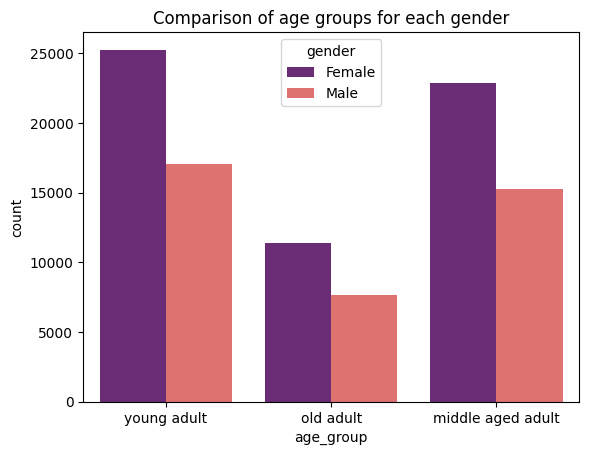

In [71]:
plt.title("Comparison of age groups for each gender")
sns.countplot(x=df['age_group'],hue='gender',data=df,palette="magma")

Female customers lying in the young adult age bracket have more invoices billed as compared to other age groups

Text(0.5, 1.0, 'Comparing age groups and payment methods')

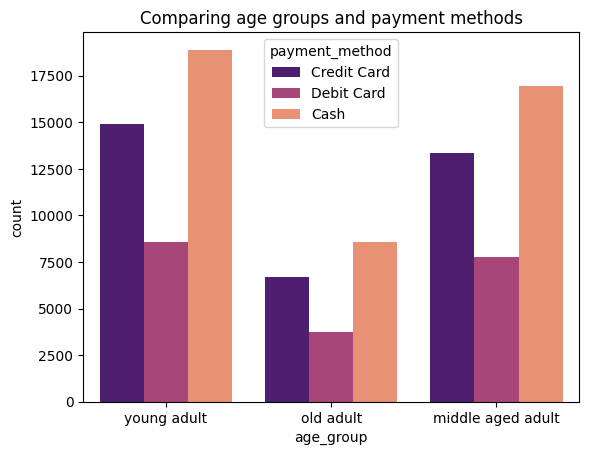

In [72]:
sns.countplot(x='age_group',hue='payment_method',data=df,palette="magma")
plt.title("Comparing age groups and payment methods")

All age groups prefer using cash for billing an invoice. Young adults use card more often as compared to the two age groups.

In [73]:
df[["age_group","total_price_per_age_group"]]

,age_group,total_price_per_age_group
0,young adult,1.063836e+08
1,young adult,1.063836e+08
2,young adult,1.063836e+08
3,old adult,4.829418e+07
4,middle aged adult,9.682800e+07
...,...,...
99452,middle aged adult,9.682800e+07
99453,young adult,1.063836e+08
99454,old adult,4.829418e+07
99455,middle aged adult,9.682800e+07


<ipython-input-74-b566422e5bd9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['total_price_per_age_group'],x=df['age_group'],palette="magma")


Text(0.5, 1.0, 'Comparing Total Price and Age Groups')

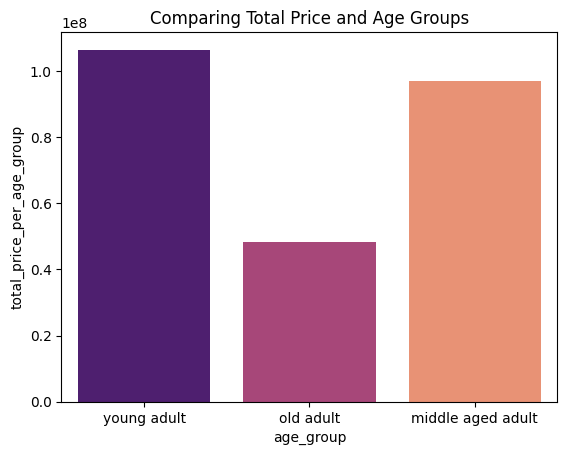

In [74]:
sns.barplot(y=df['total_price_per_age_group'],x=df['age_group'],palette="magma")
plt.title("Comparing Total Price and Age Groups")

Young adults spend the most amount of money in malls whereas old adults spend the least.

<ipython-input-75-a661607b8ec7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['total_quantity_per_age_group'],x=df['age_group'],palette="magma")


Text(0.5, 1.0, 'Comaprison of Quantities and Age Groups')

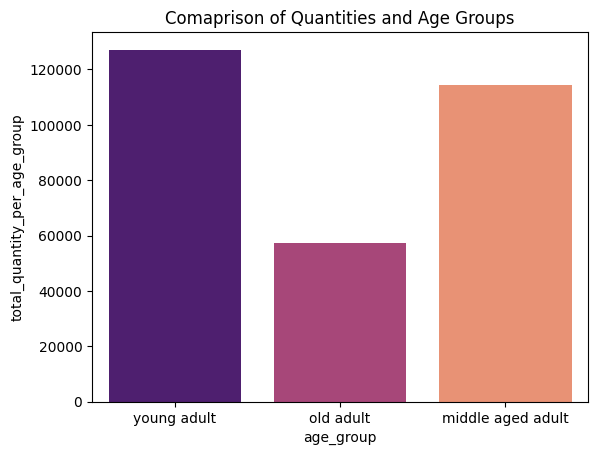

In [75]:
sns.barplot(y=df['total_quantity_per_age_group'],x=df['age_group'],palette="magma")
plt.title("Comaprison of Quantities and Age Groups")


Young adults purchase the most number of items from malls whereas old adults spend the least

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

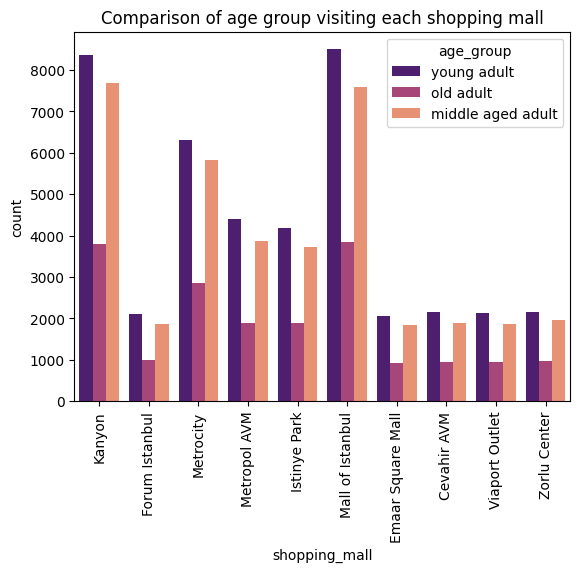

In [76]:
sns.countplot(hue=df['age_group'],x=df['shopping_mall'],palette="magma")
plt.title("Comparison of age group visiting each shopping mall")
plt.xticks(rotation=90)

Young adults,middle-aged adults and old adults have more invoices from Kanyon and Mall of Istanbul

Text(0.5, 1.0, 'Mall Locations visited by each gender')

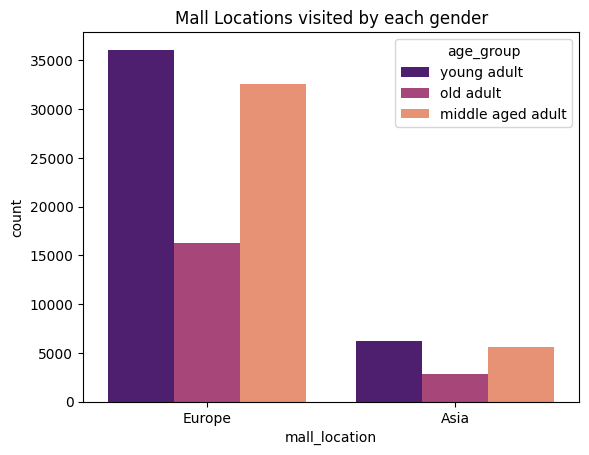

In [77]:
sns.countplot(hue=df['age_group'],x=df['mall_location'],palette="magma")
plt.title("Mall Locations visited by each gender")

Each age group prefers malls located on the European side of Istanbul.

Text(0.5, 1.0, 'Mall Types visited by each gender')

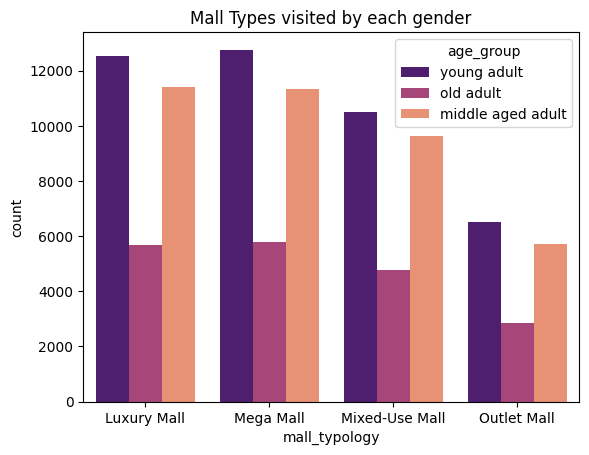

In [78]:
sns.countplot(hue=df['age_group'],x=df['mall_typology'],palette="magma")
plt.title("Mall Types visited by each gender")

Each age group prefers luxury and mega malls over other malls.

In [79]:
value_counts=df['category'].value_counts()

In [80]:
value_counts


category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7bd39e6bd420>,
 [Text(0.5139921453640044, 0.9838252255884214, 'Clothing'),
  Text(-0.9814689449119968, 0.5184772995737926, 'Cosmetics'),
  Text(-0.9957944443041387, -0.4904012894487657, 'Food & Beverage'),
  Text(-0.3574083990282832, -1.0508849776755016, 'Toys'),
  Text(0.3362260510368113, -1.057852561846022, 'Shoes'),
  Text(0.7826851847116981, -0.7870857015807207, 'Souvenir'),
  Text(0.988388570443599, -0.5051613938301889, 'Technology'),
  Text(1.0962893394823452, -0.17392436326565636, 'Books')],
 [Text(0.2824641519567952, 0.5406607095576009, '34.7%'),
  Text(-0.5393658165732594, 0.2849289664324446, '15.2%'),
  Text(-0.5472383883112834, -0.2694998077150874, '14.9%'),
  Text(-0.19641362469121867, -0.5775133661099603, '10.1%'),
  Text(0.1847728748941035, -0.5813423988523183, '10.1%'),
  Text(0.4301242906974196, -0.4325425927605762, '5.0%'),
  Text(0.543168493667203, -0.2776112164292029, '5.0%'),
  Text(0.6024653126884958, -0.09558005548833366, '5.0%')])

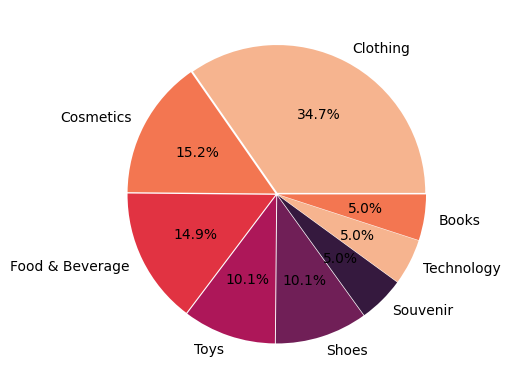

In [81]:
explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("rocket_r"),autopct="%1.1f%%",explode=explode)

Clothing emerges as the most popular category among all the invoices, followed by cosmetics and food/beverages.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Shoes'),
  Text(2, 0, 'Books'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Food & Beverage'),
  Text(5, 0, 'Toys'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Souvenir')])

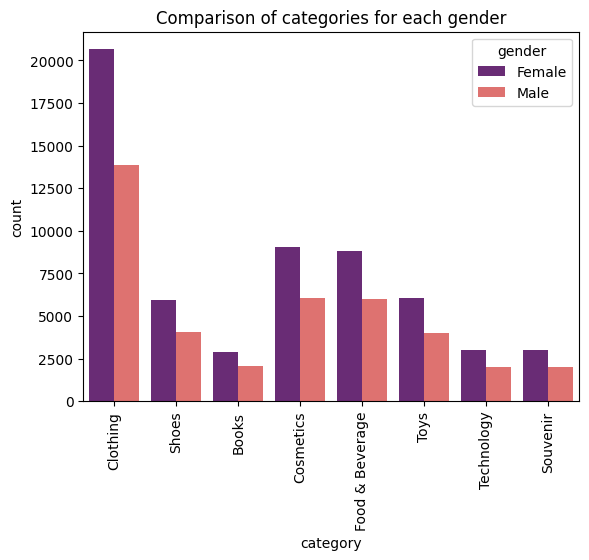

In [82]:
plt.title("Comparison of categories for each gender")
sns.countplot(x=df['category'],hue='gender',data=df,palette="magma")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Shoes'),
  Text(2, 0, 'Books'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Food & Beverage'),
  Text(5, 0, 'Toys'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Souvenir')])

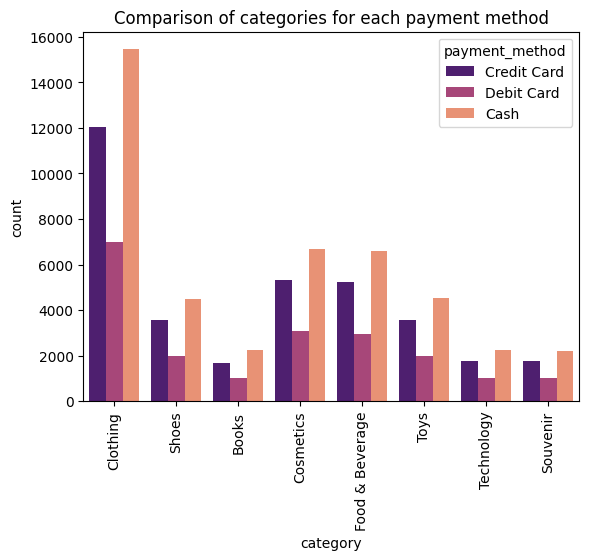

In [83]:
plt.title("Comparison of categories for each payment method")
sns.countplot(x=df['category'],hue='payment_method',data=df,palette="magma")
plt.xticks(rotation=90)

Cash payment dominates across invoices from all categories

<ipython-input-84-94917352cb93>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_price_per_category',y='category',data=df,palette="magma")


Text(0.5, 1.0, 'Comparison of Total Price per Category ')

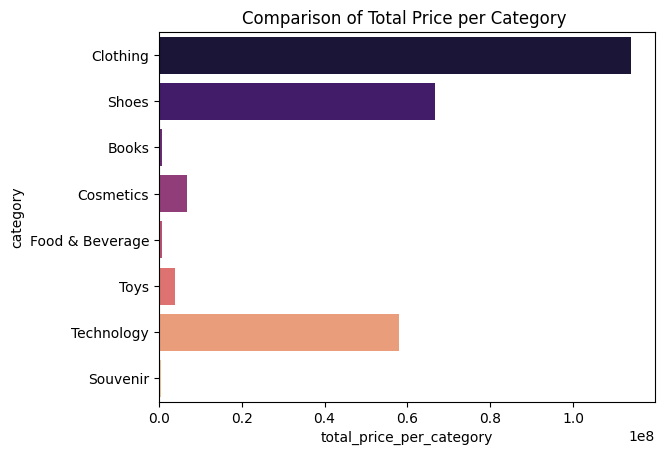

In [84]:
sns.barplot(x='total_price_per_category',y='category',data=df,palette="magma")
plt.title("Comparison of Total Price per Category ")

Clothing and shoes, followed by technology items have the highest total price

<ipython-input-85-3a281ebab89a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price',y='category',data=df,palette="magma")


Text(0.5, 1.0, 'Comparison of Price per item in each Category ')

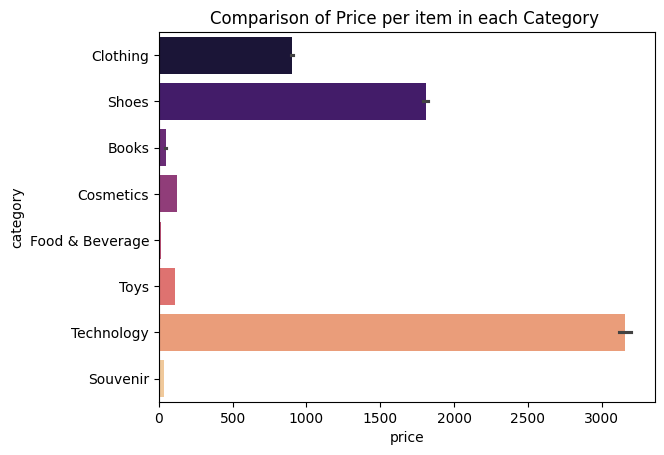

In [85]:
sns.barplot(x='price',y='category',data=df,palette="magma")
plt.title("Comparison of Price per item in each Category ")

Price per item is the highest for technology category , followed by shoes and clothing.

<ipython-input-86-84cf9985eaa1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_quantity_per_category',y='category',data=df,palette="magma")


Text(0.5, 1.0, 'Comparison of Quantities per Category ')

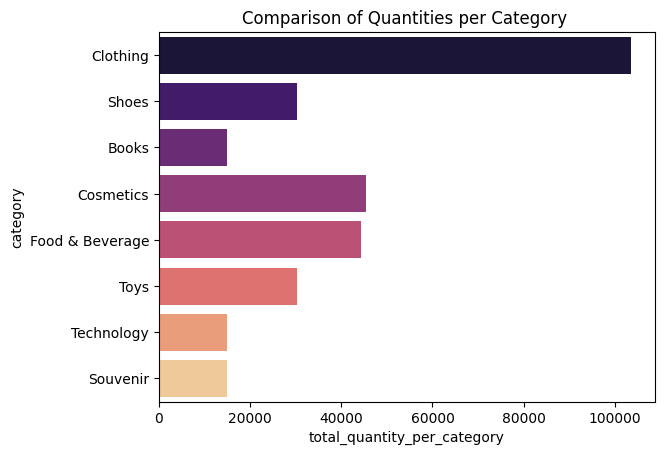

In [86]:
sns.barplot(x='total_quantity_per_category',y='category',data=df,palette="magma")
plt.title("Comparison of Quantities per Category ")

Clothing items have the highest quantities in total followed by food and beverages.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Shoes'),
  Text(2, 0, 'Books'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Food & Beverage'),
  Text(5, 0, 'Toys'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Souvenir')])

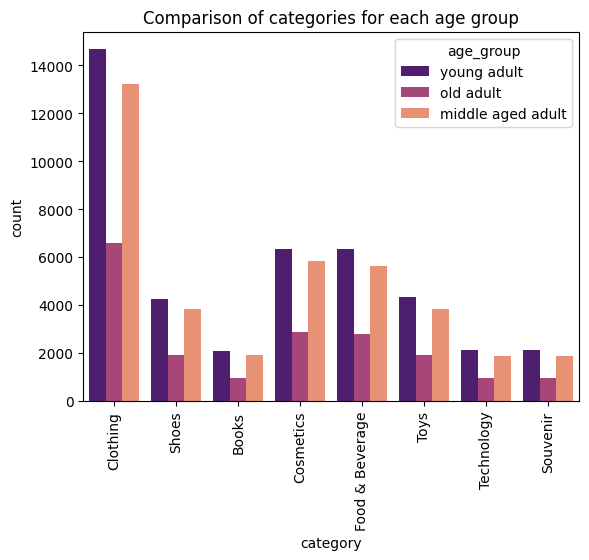

In [87]:
plt.title("Comparison of categories for each age group")
sns.countplot(x=df['category'],hue='age_group',data=df,palette="magma")
plt.xticks(rotation=90)

Each age group has purchased more clothing items as compared to other categories

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

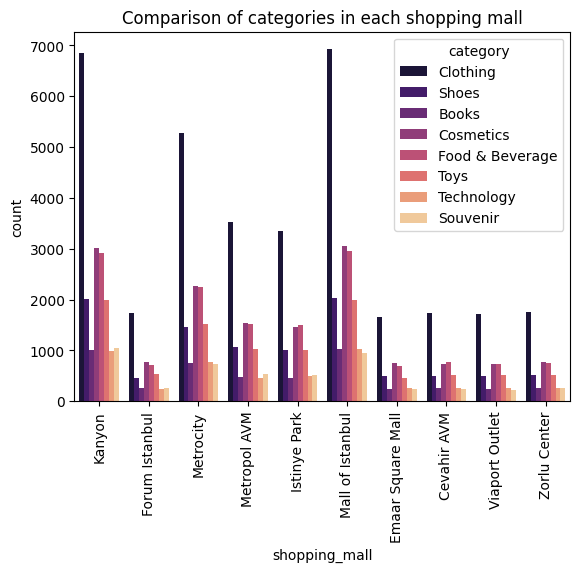

In [88]:
sns.countplot(hue=df['category'],x=df['shopping_mall'],palette="magma")
plt.title("Comparison of categories in each shopping mall")
plt.xticks(rotation=90)

Clothes are the highest sold items in each mall. Kanyon and Mall of Istanbul have the highest count of invoices issued.

([0, 1, 2, 3],
 [Text(0, 0, 'Luxury Mall'),
  Text(1, 0, 'Mega Mall'),
  Text(2, 0, 'Mixed-Use Mall'),
  Text(3, 0, 'Outlet Mall')])

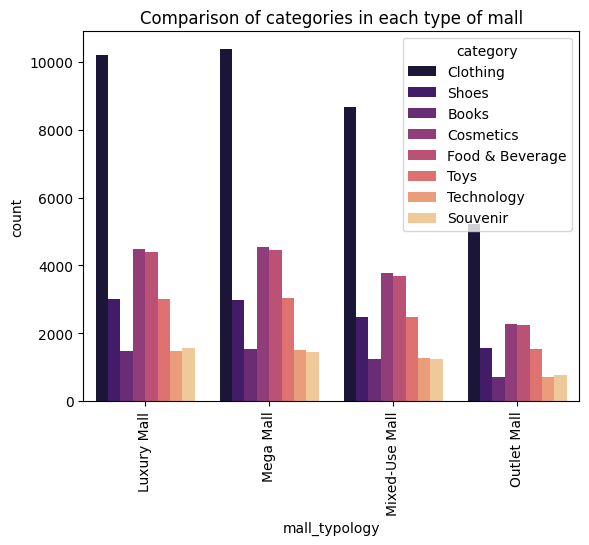

In [89]:
sns.countplot(hue=df['category'],x=df['mall_typology'],palette="magma")
plt.title("Comparison of categories in each type of mall")
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'Europe'), Text(1, 0, 'Asia')])

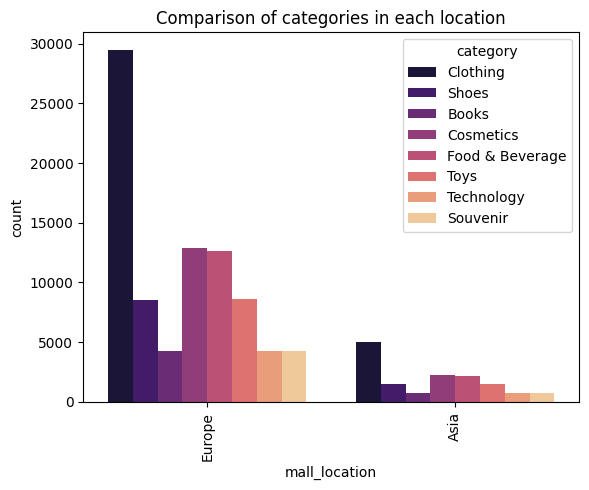

In [90]:
sns.countplot(hue=df['category'],x=df['mall_location'],palette="magma")
plt.title("Comparison of categories in each location")
plt.xticks(rotation=90)

Same trends follow in each mall type and mall location. Clothing items, followed by cosmetics and food/beverages appear the most in the invoices.

Text(0.5, 1.0, 'Assessing the Total Price of items purchased in each month')

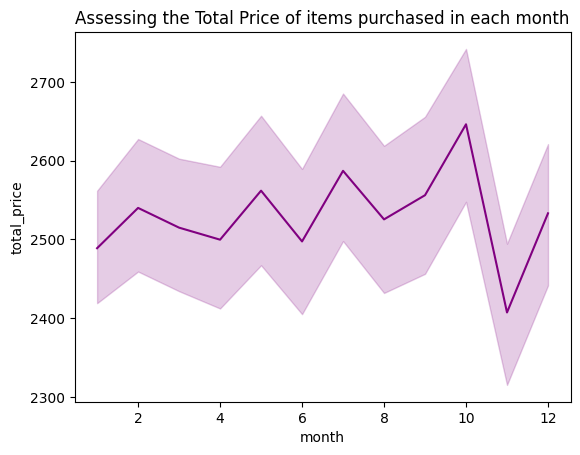

In [91]:
sns.lineplot(x=df['month'],y=df['total_price'],color="purple")
plt.title("Assessing the Total Price of items purchased in each month")

Customers spend more in the month of October. There is a sharp decrease in the total price in November followed by a slight increase in December

Text(0.5, 1.0, 'Assessing the Total Price of items purchased in each month wrt gender')

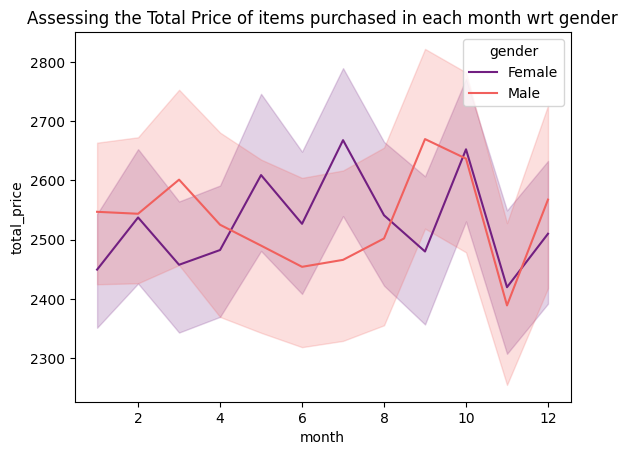

In [92]:
sns.lineplot(x=df['month'],y=df['total_price'],hue=df['gender'],palette="magma")
plt.title("Assessing the Total Price of items purchased in each month wrt gender")

A rough estimation can be made that males shop the most in September, whereas female cutomers shop more in July and October

In [93]:
value_counts=df['quantity'].value_counts()

In [94]:
value_counts

quantity
3    20149
5    19990
2    19828
1    19767
4    19723
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of quantities purchased from Malls')

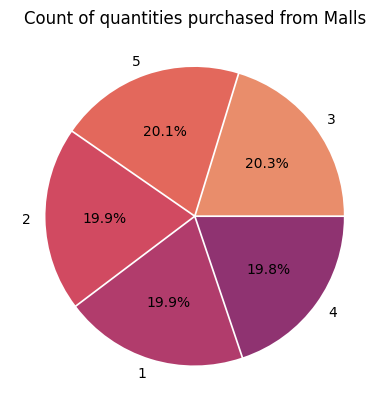

In [95]:
explode=(0.01,0.01,0.01,0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("flare"),autopct="%1.1f%%",explode=explode)
plt.title("Count of quantities purchased from Malls")

According to the invoices, customers purchase either 3 or 5 items most of the time, followed by 1,2 and 4 items

In [96]:
value_counts=df['payment_method'].value_counts()

In [97]:
value_counts

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Payment Methods')

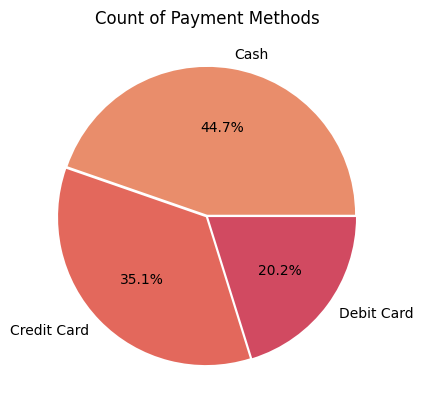

In [98]:
explode=(0.01,0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("flare"),autopct="%1.1f%%",explode=explode)
plt.title("Count of Payment Methods")

Most of the payments have been done in cash followed by credit card.

<ipython-input-99-02c37d69e75f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['shopping_mall'],palette="magma")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

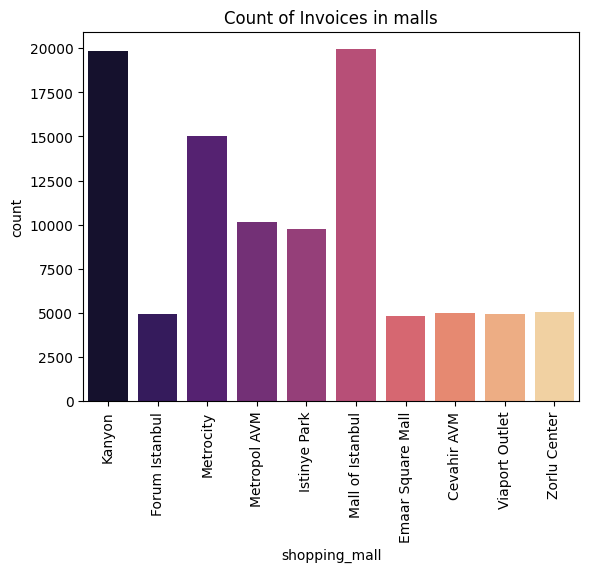

In [99]:
sns.countplot(x=df['shopping_mall'],palette="magma")
plt.title("Count of Invoices in malls")
plt.xticks(rotation=90)


More number of invoices have been issued by Kanyon and Mall of Istanbul.

In [100]:
value_counts=df['mall_typology'].value_counts()

In [101]:
value_counts

mall_typology
Mega Mall         29881
Luxury Mall       29604
Mixed-Use Mall    24897
Outlet Mall       15075
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7bd39df54100>,
 [Text(0.6511957794451062, 0.8989127081273692, 'Mega Mall'),
  Text(-1.0540872936527932, 0.3478505100754209, 'Luxury Mall'),
  Text(-0.18560179651391642, -1.0943728675048585, 'Mixed-Use Mall'),
  Text(0.9865147720469514, -0.5088109713175923, 'Outlet Mall')],
 [Text(0.3578643472626259, 0.4939970738357614, '30.0%'),
  Text(-0.5792731974127961, 0.19116109112252855, '29.8%'),
  Text(-0.1019973836698099, -0.6014121163765438, '25.0%'),
  Text(0.5421387486023785, -0.2796168400934516, '15.2%')])

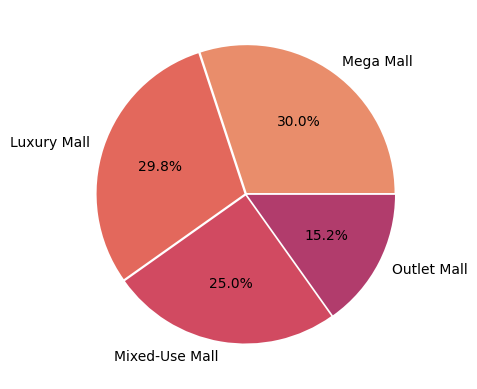

In [102]:
explode=(0.01,0.01,0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("flare"),autopct="%1.1f%%",explode=explode)

The invoices are dominated by purchases from mega malls

In [103]:
value_counts=df['mall_location'].value_counts()

In [104]:
value_counts

mall_location
Europe    84865
Asia      14592
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7bd39e4e1060>,
 [Text(-0.9941625349048607, 0.4937011790461328, 'Europe'),
  Text(0.9941625580166797, -0.4937011325060254, 'Asia')],
 [Text(-0.5463415732360044, 0.27131326055688376, '85.3%'),
  Text(0.5463415859370943, -0.2713132349807887, '14.7%')])

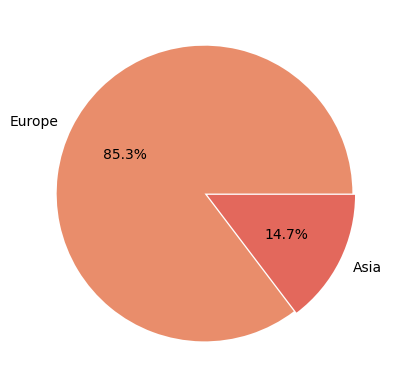

In [105]:
explode=(0.01,0.01)
plt.pie(value_counts,labels=value_counts.index,colors=sns.color_palette("flare"),autopct="%1.1f%%",explode=explode)

Most of the invoices are from malls located in the European part of Istanbul.

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25'),
  Text(2022.5, 0, '2022.50'),
  Text(2022.75, 0, '2022.75'),
  Text(2023.0, 0, '2023.00'),
  Text(2023.25, 0, '2023.25')])

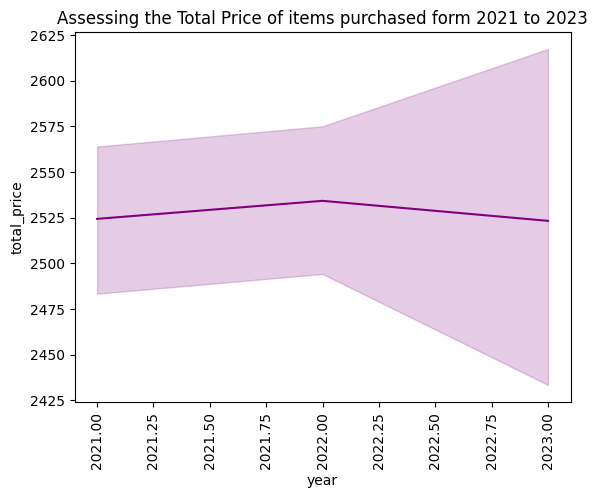

In [106]:
sns.lineplot(x=df['year'],y=df['total_price'],color="purple")
plt.title("Assessing the Total Price of items purchased form 2021 to 2023")
plt.xticks(rotation=90)

There is a slight decline in the total price of items purchased from the malls

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25'),
  Text(2022.5, 0, '2022.50'),
  Text(2022.75, 0, '2022.75'),
  Text(2023.0, 0, '2023.00'),
  Text(2023.25, 0, '2023.25')])

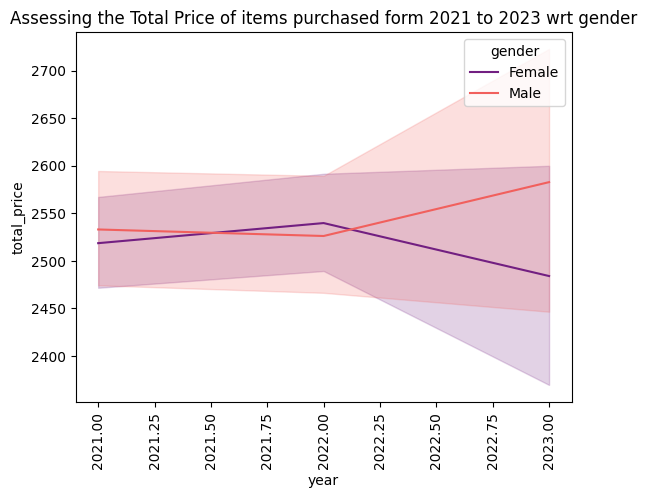

In [107]:
sns.lineplot(x=df['year'],y=df['total_price'],hue=df["gender"],palette="magma")
plt.title("Assessing the Total Price of items purchased form 2021 to 2023 wrt gender")
plt.xticks(rotation=90)

The total price of items purchased by female customers has declined sharply.

Text(0.5, 1.0, 'Assessing the Total Price of items purchased in each month wrt age_group')

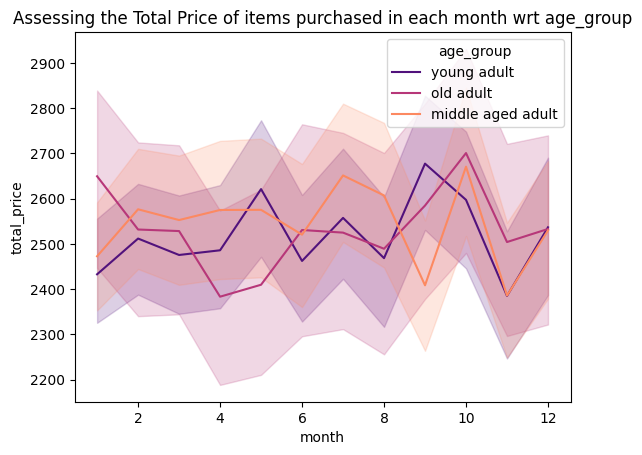

In [108]:
sns.lineplot(x=df['month'],y=df['total_price'],hue=df['age_group'],palette="magma")
plt.title("Assessing the Total Price of items purchased in each month wrt age_group")

The total amount of items purchased by Old and middle aged adults is highest in October as compared to Young adults who purchase the highest total amount of items in September.

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25'),
  Text(2022.5, 0, '2022.50'),
  Text(2022.75, 0, '2022.75'),
  Text(2023.0, 0, '2023.00'),
  Text(2023.25, 0, '2023.25')])

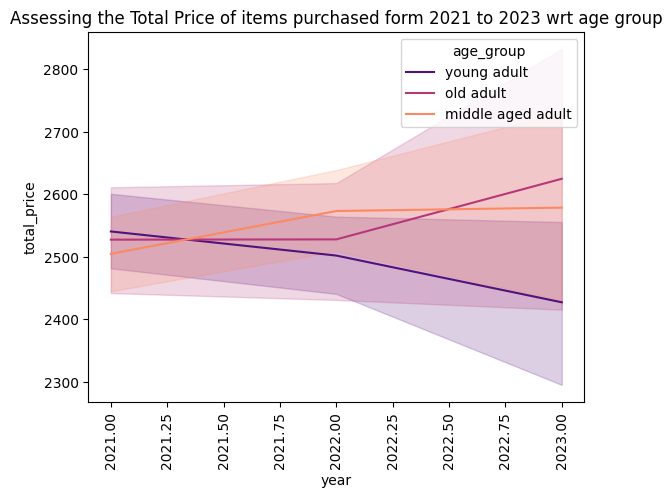

In [109]:
sns.lineplot(x=df['year'],y=df['total_price'],hue=df["age_group"],palette="magma")
plt.title("Assessing the Total Price of items purchased form 2021 to 2023 wrt age group")
plt.xticks(rotation=90)

The total amount of purchases made by old adults is increasing since the beginning of 2022 whereas for young adults, the total amount of purchases since the beginning of 2022 has decreased steeply.

Text(0.5, 1.0, 'Assessing the Total Price of items purchased in each month wrt payment method')

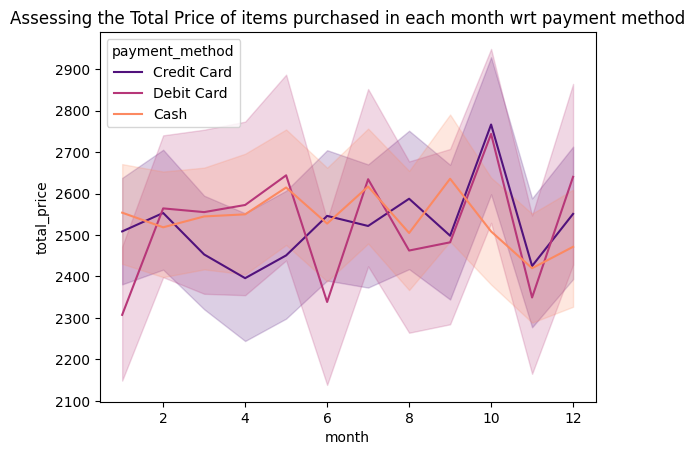

In [110]:
sns.lineplot(x=df['month'],y=df['total_price'],hue=df['payment_method'],palette="magma")
plt.title("Assessing the Total Price of items purchased in each month wrt payment method")

The payment of items in form of cash is roughly linear and reaches its peak in the months of May, July and September.  Whereas the payment in form of card reaches its peak during October.

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25'),
  Text(2022.5, 0, '2022.50'),
  Text(2022.75, 0, '2022.75'),
  Text(2023.0, 0, '2023.00'),
  Text(2023.25, 0, '2023.25')])

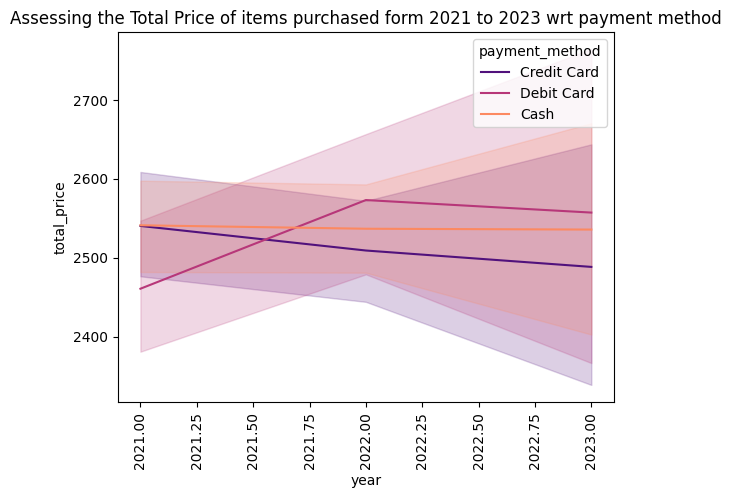

In [111]:
sns.lineplot(x=df['year'],y=df['total_price'],hue=df["payment_method"],palette="magma")
plt.title("Assessing the Total Price of items purchased form 2021 to 2023 wrt payment method")
plt.xticks(rotation=90)

Payment in cash is linear across the years. The usage of credit card has slightly dropped whereas the usage of debit card has increased since the beginning of 2022.

In [112]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year',
       'month', 'mall_typology', 'mall_location', 'total_price', 'age_group',
       'total_price_per_gender', 'total_price_per_age_group',
       'total_price_per_category', 'total_price_per_payment_method',
       'total_price_per_shopping_mall', 'total_price_per_mall_typology',
       'total_price_per_mall_location', 'price_per_gender',
       'total_quantity_per_gender', 'total_quantity_per_category',
       'total_quantity_per_payment_method', 'total_quantity_per_shopping_mall',
       'total_quantity_per_mall_typology', 'total_quantity_per_mall_location',
       'total_quantity_per_age_group'],
      dtype='object')

Text(0.5, 1.0, 'Assessing the Total Price of items purchased in each month wrt mall typology')

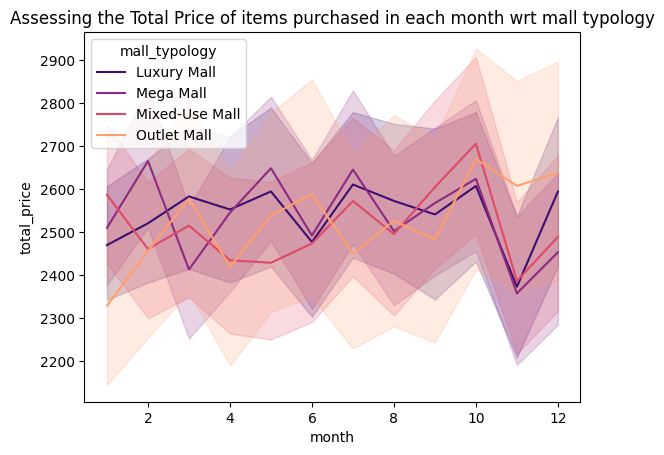

In [113]:
sns.lineplot(x=df['month'],y=df['total_price'],hue=df['mall_typology'],palette="magma")
plt.title("Assessing the Total Price of items purchased in each month wrt mall typology")

All malls have the highest number of invoices billed during October.

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25'),
  Text(2022.5, 0, '2022.50'),
  Text(2022.75, 0, '2022.75'),
  Text(2023.0, 0, '2023.00'),
  Text(2023.25, 0, '2023.25')])

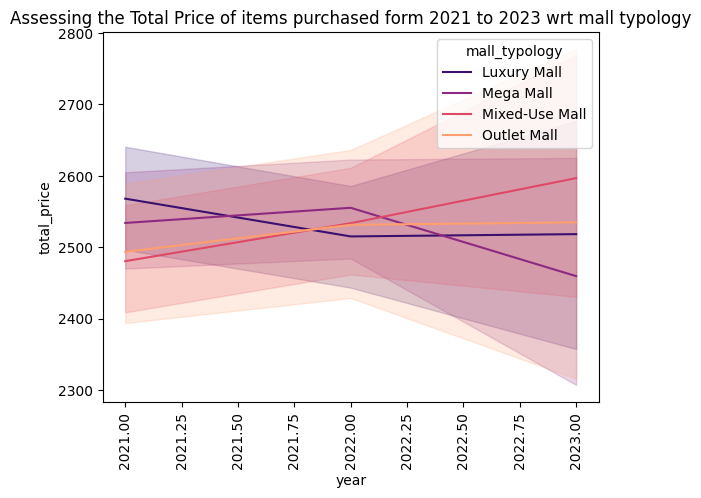

In [114]:
sns.lineplot(x=df['year'],y=df['total_price'],hue=df["mall_typology"],palette="magma")
plt.title("Assessing the Total Price of items purchased form 2021 to 2023 wrt mall typology")
plt.xticks(rotation=90)

The total price of items purchased from mega malls has steadily increased whereas total price of items purchased from mega malls has decreased since the beginning of 2022.

Text(0.5, 1.0, 'Assessing the Total Price of items purchased in each month wrt mall location')

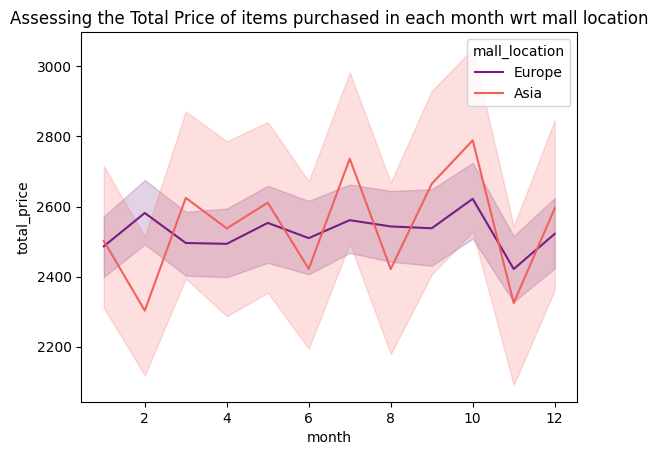

In [115]:
sns.lineplot(x=df['month'],y=df['total_price'],hue=df['mall_location'],palette="magma")
plt.title("Assessing the Total Price of items purchased in each month wrt mall location")

The total price of items purchased from the malls located on the European side of Istanbul have a consistent pattern over the months, where October and February fetch the highest total price of items billed.
The total price of items purchased in the malls located in Asia drop in February and keep increasing till the end of the year, with October being the highest billing month.

(array([2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25,
        2022.5 , 2022.75, 2023.  , 2023.25]),
 [Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25'),
  Text(2022.5, 0, '2022.50'),
  Text(2022.75, 0, '2022.75'),
  Text(2023.0, 0, '2023.00'),
  Text(2023.25, 0, '2023.25')])

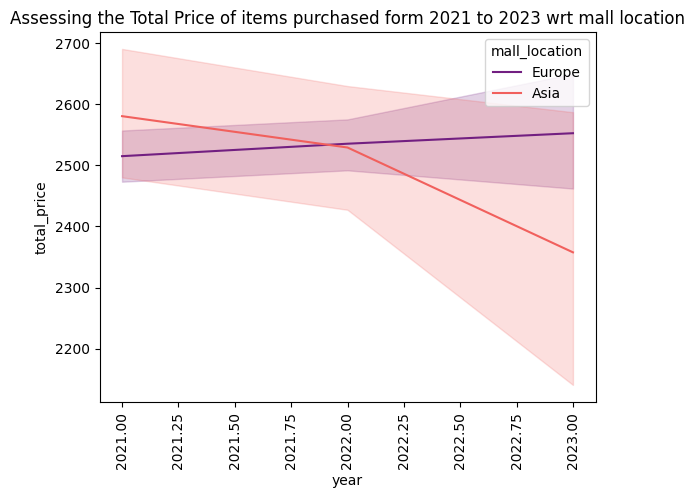

In [116]:
sns.lineplot(x=df['year'],y=df['total_price'],hue=df["mall_location"],palette="magma")
plt.title("Assessing the Total Price of items purchased form 2021 to 2023 wrt mall location")
plt.xticks(rotation=90)

The total price of items purchased from malls on the Asian side of Istanbul has sharply declined from the beginning of 2022 whereas total price of items purchased from malls on the European side of Istanbul has been consistently increasing.

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [118]:
df['customer_id']=le.fit_transform(df['customer_id'])

In [119]:
df['payment_method']=le.fit_transform(df['payment_method'])

In [120]:
df['gender']=le.fit_transform(df['gender'])

In [121]:
df['category']=le.fit_transform(df['category'])

In [122]:
df['shopping_mall']=le.fit_transform(df['shopping_mall'])

In [123]:
df['mall_typology']=le.fit_transform(df['mall_typology'])

In [124]:
df['mall_location']=le.fit_transform(df['mall_location'])

In [125]:
df['age_group']=le.fit_transform(df['age_group'])

In [126]:
df['invoice_no']=le.fit_transform(df['invoice_no'])

In [127]:
df2=df[['gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'shopping_mall']].head(50)

<Axes: >

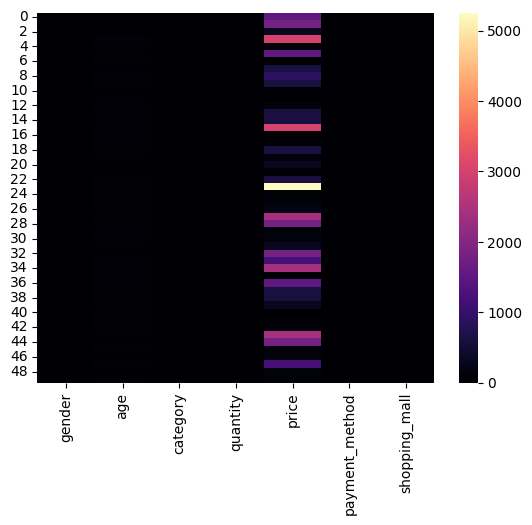

In [128]:

sns.heatmap(data=df2,cmap="magma")